In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [11]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

##Read the CSV and Perform Basic Data Cleaning

In [12]:
# Load the data# Read in our ramen data
from google.colab import files
uploaded = files.upload()

Saving df.csv to df (1).csv


In [14]:
# Load the file
df = pd.read_csv('df.csv')

In [15]:
df.head()

,Country,Year,Area,Activity,Sex,Age,Fatal_Y_N,month,hemisph,Season
0,USA,2018,Georgia,Swimming,F,11,N,6,North,summer
1,AUSTRALIA,2018,New South Wales,Boarding Sports,M,0,N,6,South,winter
2,AUSTRALIA,2018,New South Wales,Boarding Sports,M,0,N,6,South,winter
3,BRAZIL,2018,Pernambuco,Swimming,M,18,Y,6,South,winter
4,USA,2018,Florida,Fishing,M,52,N,5,North,spring


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    1580 non-null   object
 1   Year       1580 non-null   int64 
 2   Area       1580 non-null   object
 3   Activity   1580 non-null   object
 4   Sex        1580 non-null   object
 5   Age        1580 non-null   object
 6   Fatal_Y_N  1580 non-null   object
 7   month      1580 non-null   int64 
 8   hemisph    1580 non-null   object
 9   Season     1580 non-null   object
dtypes: int64(2), object(8)
memory usage: 123.6+ KB


In [17]:
# drop rows where Fatal_Y_N = "UNKNOWN" 
df = df[~df['Fatal_Y_N'].str.contains('UNKNOWN')]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1579
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    1578 non-null   object
 1   Year       1578 non-null   int64 
 2   Area       1578 non-null   object
 3   Activity   1578 non-null   object
 4   Sex        1578 non-null   object
 5   Age        1578 non-null   object
 6   Fatal_Y_N  1578 non-null   object
 7   month      1578 non-null   int64 
 8   hemisph    1578 non-null   object
 9   Season     1578 non-null   object
dtypes: int64(2), object(8)
memory usage: 135.6+ KB


In [19]:
columns = [
    'Country', 'Year', 'Area', 'Activity', 'Sex', 'Age', 'month', 'hemisph', 'Season'
]

target = ['Fatal_Y_N']

In [20]:
columns_obj = df.select_dtypes(include='object').columns
print(len(columns_obj))

8


In [21]:
df.shape

(1578, 10)

##Split the Data into Training and Testing

In [22]:
# Create our features
X = df.drop(columns= "Fatal_Y_N")
X.shape

(1578, 9)

In [23]:
# Create our target
y = df.loc[:,target]
y

,Fatal_Y_N
0,N
1,N
2,N
3,Y
4,N
...,...
1575,N
1576,N
1577,N
1578,N


In [26]:
# Check the balance of our target values
y.value_counts()

Fatal_Y_N
N            1427
Y             151
dtype: int64

In [28]:
# Convert string values to numerical with get_dummies method
X_encoded = pd.get_dummies(X)
X_encoded.shape

(1578, 351)

In [29]:
# X_endcoded feature matrix
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [30]:
# fit and transfrom X_encoded
X_encoded_scaled = data_scaler.fit_transform(X_encoded)
X_encoded_scaled[:1]

array([[ 1.62467854, -0.22695866, -0.02518165, -0.46848105, -0.1693611 ,
        -0.02518165, -0.1713307 , -0.02518165, -0.04364358, -0.06675148,
        -0.02518165, -0.06178021, -0.03562352, -0.06675148, -0.1103961 ,
        -0.09114115, -0.02518165, -0.09461187, -0.02518165, -0.02518165,
        -0.02518165, -0.06178021, -0.03562352, -0.03562352, -0.02518165,
        -0.03562352, -0.02518165, -0.02518165, -0.02518165, -0.10120908,
        -0.02518165, -0.06178021, -0.12161824, -0.12427395, -0.02518165,
        -0.02518165, -0.03562352, -0.07138306, -0.02518165, -0.1344043 ,
        -0.05041127, -0.02518165, -0.02518165, -0.05041127, -0.05041127,
        -0.26425463, -0.03562352, -0.07573729, -0.03562352, -0.02518165,
        -0.02518165, -0.02518165, -0.05637942, -0.05637942, -0.05041127,
        -0.02518165, -0.02518165, -0.02518165,  0.93374842, -0.03562352,
        -0.05041127, -0.02518165, -0.02518165, -0.02518165, -0.02518165,
        -0.09461187, -0.07138306, -0.02518165, -0.0

In [31]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, random_state = 1)
X_train

array([[ 0.68495904, -1.20193351, -0.02518165, ...,  1.97499902,
        -0.79595249, -0.44005226],
       [-0.63064825, -0.22695866, -0.02518165, ..., -0.50632937,
         1.25635639, -0.44005226],
       [-0.25476046,  1.72299104, -0.02518165, ..., -0.50632937,
         1.25635639, -0.44005226],
       ...,
       [-0.63064825,  0.09803296, -0.02518165, ..., -0.50632937,
         1.25635639, -0.44005226],
       [ 1.24879074, -1.85191674, -0.02518165, ..., -0.50632937,
        -0.79595249,  2.27245737],
       [-0.63064825,  1.72299104, -0.02518165, ..., -0.50632937,
        -0.79595249,  2.27245737]])

In [32]:
y_train.value_counts()

Fatal_Y_N
N            1071
Y             112
dtype: int64

In [33]:
# get a baseline 
# Calculate the accuracy score of the model.
# Generate a confusion matrix.
# classification report .ing logistics regression
# imbalanced classification report .ing logistics regression

# Model
# Fit
# Access

In [34]:
# Instantiate a logistic regression model
#from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [35]:
# Fit our model with the training data
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [36]:
# Create prediction using predict() method
y_pred = classifier.predict(X_test)
y_pred

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [37]:
# calculate accuracy
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8759493670886076

In [38]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[337  19]
 [ 30   9]]


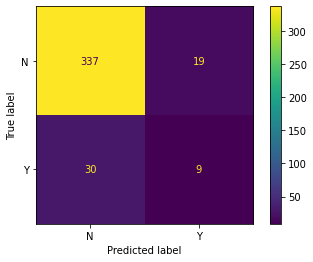

In [39]:
# confusion matrix with ConfusionMatrixDisply
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= classifier.classes_)
disp.plot()


In [40]:
# view classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           N       0.92      0.95      0.93       356
           Y       0.32      0.23      0.27        39

    accuracy                           0.88       395
   macro avg       0.62      0.59      0.60       395
weighted avg       0.86      0.88      0.87       395



 ## Random Forest Classifier

In [41]:
# Resample the training data with the BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier
# model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# fit
rf_model = rf_model.fit(X_train, y_train)

# predict
predictions = rf_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [42]:
# Calculated the accuracy score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9012658227848102

In [43]:
# Display the confusion matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[353,   3],
       [ 36,   3]])

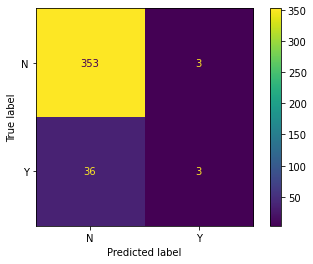

In [45]:
# confusion matrix with ConfusionMatrixDisply
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= classifier.classes_)
disp.plot()


In [46]:
# Print the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.91      0.99      0.95       356
           Y       0.50      0.08      0.13        39

    accuracy                           0.90       395
   macro avg       0.70      0.53      0.54       395
weighted avg       0.87      0.90      0.87       395



In [47]:
# List the features sorted in descending order by feature importance

importances = rf_model.feature_importances_
importances

array([8.94812283e-02, 7.30343201e-02, 2.54799436e-03, 1.04547043e-02,
       1.97620263e-03, 6.21781596e-05, 1.06851549e-02, 9.57465415e-05,
       1.24716171e-05, 4.55383372e-04, 5.13618176e-07, 1.45970337e-03,
       3.44211960e-03, 8.97376017e-04, 3.91834267e-03, 9.29143745e-03,
       4.91968719e-06, 1.15148675e-03, 2.54526614e-03, 0.00000000e+00,
       0.00000000e+00, 2.27485818e-04, 7.55210776e-06, 0.00000000e+00,
       0.00000000e+00, 1.16582320e-04, 1.38471376e-05, 8.05539523e-05,
       3.35266423e-04, 4.10795696e-03, 0.00000000e+00, 1.47724792e-03,
       6.27962688e-03, 3.49412952e-03, 1.10699039e-04, 0.00000000e+00,
       0.00000000e+00, 2.81798595e-03, 3.48069249e-05, 9.32857218e-03,
       7.08863275e-05, 0.00000000e+00, 8.03372634e-07, 3.54060779e-03,
       1.04643075e-04, 1.00433477e-02, 0.00000000e+00, 6.17171715e-05,
       3.24491575e-06, 1.16699677e-05, 3.32001010e-03, 0.00000000e+00,
       1.33535177e-02, 3.58196537e-03, 2.52310447e-03, 0.00000000e+00,
      

In [48]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08948122827563576, 'Country'),
 (0.0730343200645641, 'Year'),
 (0.010685154923412644, 'month'),
 (0.010454704264002343, 'Activity'),
 (0.002547994358848863, 'Area'),
 (0.001976202634330069, 'Sex'),
 (9.574654150216353e-05, 'hemisph'),
 (6.217815964898296e-05, 'Age'),
 (1.2471617105391044e-05, 'Season')]